In [1]:
#https://www.kaggle.com/ujjwal9/credit-card-applications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
!pip install minisom
!pip install keras
!pip install tensorflow
import tensorflow as tf
import keras


In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
datos = df.iloc[:, :-1]
aprovado = df.iloc[:, -1] #agrra la ultima columna

In [6]:
#columnas tranformada en 0 y 1 (magnitudes muy distintass)
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler(feature_range = (0, 1)) #rango de datos escalados
datos = MM.fit_transform(datos)

In [7]:
#mapa de datos
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(datos) #peso aleatorio
som.train_random(data = datos, num_iteration = 100) #entrena datos

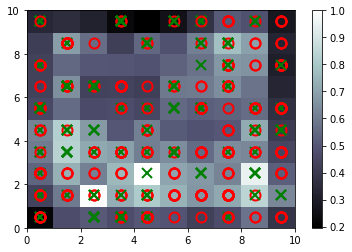

In [8]:
# mapa de resultados (calor)
from pylab import bone, pcolor, colorbar, plot, show
bone() 
pcolor(som.distance_map().T) #distancia media entre neuronas
colorbar() #cuadrado
markers = ['o', 'x']  # indica si han recibido tarjeta eje y
colors = ['red', 'green']
for i, x in enumerate(datos): #indice de cada cliemte y datos vector de cada cliente
    w = som.winner(x)  # nodos ganadores
    plot(w[0] + 0.5, w[1] + 0.5,  #centrar la en el centro del cuadrado
         markers[aprovado[i]],
         markeredgecolor = colors[aprovado[i]],
         markerfacecolor = 'None',  #marcador sin relleno
         markersize = 10,   #tamaño marcados
         markeredgewidth = 2)  #ancho del marcador
show()

In [10]:
# Encontrando Fraude
mapeo = som.win_map(datos) #encuentra nodos
fraude = np.concatenate((mapeo[(3,2)],mapeo[(5,3)],mapeo[(9,3)]), axis=0) #nodos fraude
fraude = MM.inverse_transform(fraude) #revertir escalado (0 y 1) 

In [11]:
fraude

array([[1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5694666e+07, 0.0000000e+00, 2.6500000e+01, 2.7100000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 8.5000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 8.0000000e+01, 1.0000000e+00],
       [1.5711299e+07, 0.0000000e+00, 2.2670000e+01, 3.3500000e-01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 7.5000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5777994e+07, 1.0000000e+00, 4.2000000e+01, 9.7900000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 7.9600000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [12]:
#clientes que cometieron fraude
import pandas as pd
matriz = pd.DataFrame(fraude)
matriz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15648069.0,0.0,24.50,1.750,1.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,132.0,1.0
1,15694666.0,0.0,26.50,2.710,1.0,8.0,4.0,0.085,0.0,0.0,0.0,0.0,1.0,80.0,1.0
2,15711299.0,0.0,22.67,0.335,2.0,11.0,4.0,0.750,0.0,0.0,0.0,0.0,1.0,160.0,1.0
3,15777994.0,1.0,42.00,9.790,2.0,14.0,8.0,7.960,1.0,1.0,8.0,0.0,2.0,0.0,1.0
4,15697310.0,1.0,41.17,4.040,2.0,13.0,8.0,7.000,1.0,1.0,8.0,0.0,2.0,320.0,1.0
5,15810723.0,1.0,38.17,10.125,2.0,14.0,4.0,2.500,1.0,1.0,6.0,0.0,2.0,520.0,197.0
6,15766663.0,1.0,53.92,9.625,2.0,10.0,4.0,8.665,1.0,1.0,5.0,0.0,2.0,0.0,1.0
7,15592326.0,1.0,23.17,11.125,2.0,14.0,8.0,0.460,1.0,1.0,1.0,0.0,2.0,100.0,1.0
8,15671293.0,1.0,54.83,15.500,2.0,10.0,9.0,0.000,1.0,1.0,20.0,0.0,2.0,152.0,131.0
9,15703177.0,1.0,30.17,6.500,2.0,13.0,4.0,3.125,1.0,1.0,8.0,0.0,2.0,330.0,1201.0


In [16]:
#Pasando de Aprendizaje No Supervisado - a Supervisado
# esta es la matriz
clientes = df.iloc[:, 1:].values

# Creando Variable Dependient
es_fraude = np.zeros(len(df)) #creando matriz con 0
for i in range(len(df)): #clientes
    if df.iloc[i,0] in fraude: # primera columna numero ID en fraude
        es_fraude[i] = 1 
        
        
# Escalado de Categorias
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clientes = sc.fit_transform(clientes) # variables diferentes escalas. numeros escalados

# Part 2 - Creando Red Neuronal

# Importando paquetes red neuronal
from keras.models import Sequential # iniciar red
from keras.layers import Dense #agregar capas a la red

# Iniciando RNA
clasificador = Sequential() #capas

# Input y Primera Capa Oculta
clasificador.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Output
clasificador.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compila
clasificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Encajando Red Neuronal en Set de Entrenamiento
clasificador.fit(clientes, es_fraude, batch_size = 1, epochs = 5) #iteraciones

Epoch 1/5
690/690 [==============================] - 1s 850us/step - loss: 0.4797 - accuracy: 0.9507
Epoch 2/5
690/690 [==============================] - 1s 851us/step - loss: 0.2279 - accuracy: 0.9565
Epoch 3/5
690/690 [==============================] - 1s 845us/step - loss: 0.1682 - accuracy: 0.9565
Epoch 4/5
690/690 [==============================] - 1s 848us/step - loss: 0.1482 - accuracy: 0.9565
Epoch 5/5
690/690 [==============================] - 1s 850us/step - loss: 0.1389 - accuracy: 0.9565


In [38]:
# Prediccion de Fraude Basado en Probabilidad
y_pred = clasificador.predict(clientes)
y_pred = pd.DataFrame(y_pred)
y_pred


,0
0,0.024233
1,0.012445
2,0.008052
3,0.013440
4,0.047565
...,...
685,0.024410
686,0.012518
687,0.002094
688,0.083299
